### 1. Import libraries 

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

### 2.Loading Dataset

In [68]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### 3. Data understanding

In [69]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [70]:
##Converting the Taxable income variable to bucketing.
fraud_data["income"]="<=30000"
fraud_data.loc[fraud_data["Taxable.Income"]>=30000,"income"]="Good"
fraud_data.loc[fraud_data["Taxable.Income"]<=30000,"income"]="Risky"

In [71]:
##Droping the Taxable income variable
fraud_data.drop(["Taxable.Income"],axis=1,inplace=True)

In [72]:
fraud_data.head(50)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
5,NO,Divorced,116382,0,NO,Good
6,NO,Divorced,80890,8,YES,Good
7,YES,Single,131253,3,YES,Good
8,NO,Single,102481,12,YES,Good
9,YES,Divorced,155482,4,YES,Good


### 4. Data preprocessing

In [73]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud_data.columns:
    if fraud_data[column_name].dtype == object:
        fraud_data[column_name] = le.fit_transform(fraud_data[column_name])
    else:
        pass

In [74]:
##Splitting the data into featuers and labels
x = fraud_data.iloc[:,0:5]
y = fraud_data.iloc[:,5]

In [75]:
## Collecting the column names
colnames = list(fraud_data.columns)
predictors = colnames[0:5]
target = colnames[5]

In [76]:
##Splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = labels)

In [77]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

###  5. Model Training

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=4,) #Prunning
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

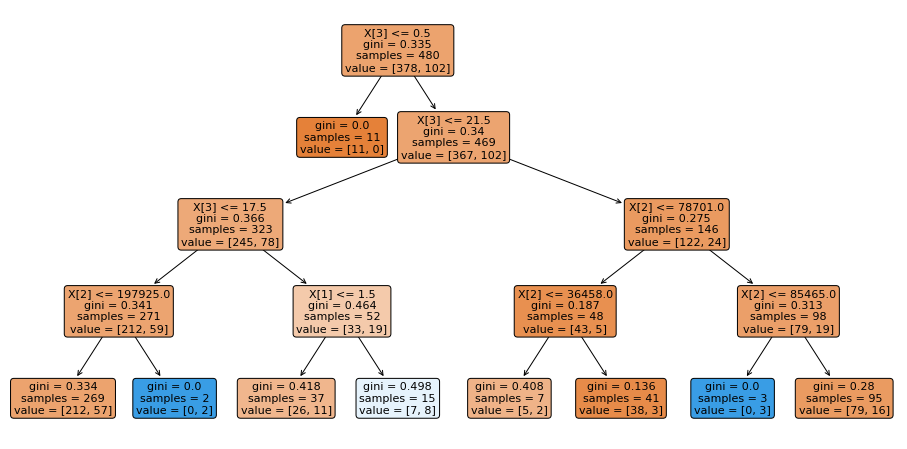

In [79]:
#plotting the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))
plot_tree(dt_model,filled=True, rounded=True)
plt.show()

### 6.Model Testing

In [80]:
y_pred_train = dt_model.predict(x_train)
y_pred_test = dt_model.predict(x_test)

### 7.Model Evaluation

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix

###### Training Data

In [82]:
accuracy_score(y_train,y_pred_train)

0.8

In [83]:
confusion_matrix(y_train,y_pred_train)

array([[371,   7],
       [ 89,  13]], dtype=int64)

###### Testing Data

In [84]:
accuracy_score(y_test,y_pred_test)

0.775

In [85]:
confusion_matrix(y_test,y_pred_test)

array([[92,  6],
       [21,  1]], dtype=int64)

#### getting the optimum parameters for the given dataset at once

In [86]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [87]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator  = dt_model,
                           param_grid = {'criterion': ['gini','entropy'],
                                         'max_depth' : [4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10]})

In [88]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [89]:
grid_search.best_score_

0.7866666666666666